In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # Importing stats for statistical tests


In [2]:
# Load the dataset
file = "spotify.csv"

df = pd.read_csv(file)

# Display the shape of the DataFrame
rowC, columnC = df.shape
print(f"Rows: {rowC}, Columns: {columnC}")

# Show descriptive statistics
print(df.describe())
print("\n-----------------------------\n")
print(df.info())
print("\n-----------------------------\n")
print(df.dtypes)

# Inspect the first few rows to identify any issues
print(df.head())


Rows: 35, Columns: 26
       artist_count  released_year  released_month  released_day  \
count     35.000000      35.000000       35.000000     35.000000   
mean       1.485714    2022.457143        5.200000     17.914286   
std        0.658493       1.804290        2.752539      9.413293   
min        1.000000    2013.000000        1.000000      1.000000   
25%        1.000000    2023.000000        3.000000     12.500000   
50%        1.000000    2023.000000        5.000000     18.000000   
75%        2.000000    2023.000000        7.000000     24.500000   
max        3.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count             35.000000          35.000000  3.500000e+01   
mean            3809.200000          69.771429  4.626170e+08   
std             4778.987505          32.622697  5.243505e+08   
min              250.000000          19.000000  2.258116e+07   
25%              861.500000          41.50000

In [3]:
numerical_cols = [
    'artist_count', 'released_year', 'released_month', 'released_day', 
    'in_spotify_playlists', 'in_spotify_charts', 'streams', 
    'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 
    'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 
    'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 
    'liveness_%', 'speechiness_%','rating'
]

# Attempt to convert specified columns to numeric, forcing errors to NaN
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values after conversion
df.dropna(subset=numerical_cols, inplace=True)

# Re-check the data types after conversion
print(df.dtypes)


track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                   int64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
cover_url                object
rating                    int64
dtype: object


In [4]:
numericalFeatures = df.select_dtypes(include='number')

# Calculate statistics
mean = numericalFeatures.mean()
median = numericalFeatures.median()
stdDev = numericalFeatures.std()
quantiles = numericalFeatures.quantile([0.25, 0.5, 0.75])

print(f"MEAN:\n{mean}\n\nMEDIAN:\n{median}\n\nSTANDARD DEVIATION:\n{stdDev}\n\nQUANTILES:\n{quantiles}")


MEAN:
artist_count            1.500000e+00
released_year           2.022400e+03
released_month          5.366667e+00
released_day            1.850000e+01
in_spotify_playlists    3.039667e+03
in_spotify_charts       6.360000e+01
streams                 3.942689e+08
in_apple_playlists      6.713333e+01
in_apple_charts         1.505000e+02
in_deezer_playlists     9.740000e+01
in_deezer_charts        1.186667e+01
in_shazam_charts        3.048667e+02
bpm                     1.297667e+02
danceability_%          7.010000e+01
valence_%               5.830000e+01
energy_%                7.030000e+01
acousticness_%          2.180000e+01
instrumentalness_%      2.733333e+00
liveness_%              1.766667e+01
speechiness_%           7.900000e+00
rating                  8.666667e-01
dtype: float64

MEDIAN:
artist_count                    1.0
released_year                2023.0
released_month                  5.5
released_day                   21.5
in_spotify_playlists         2303.0
in_spotify_ch

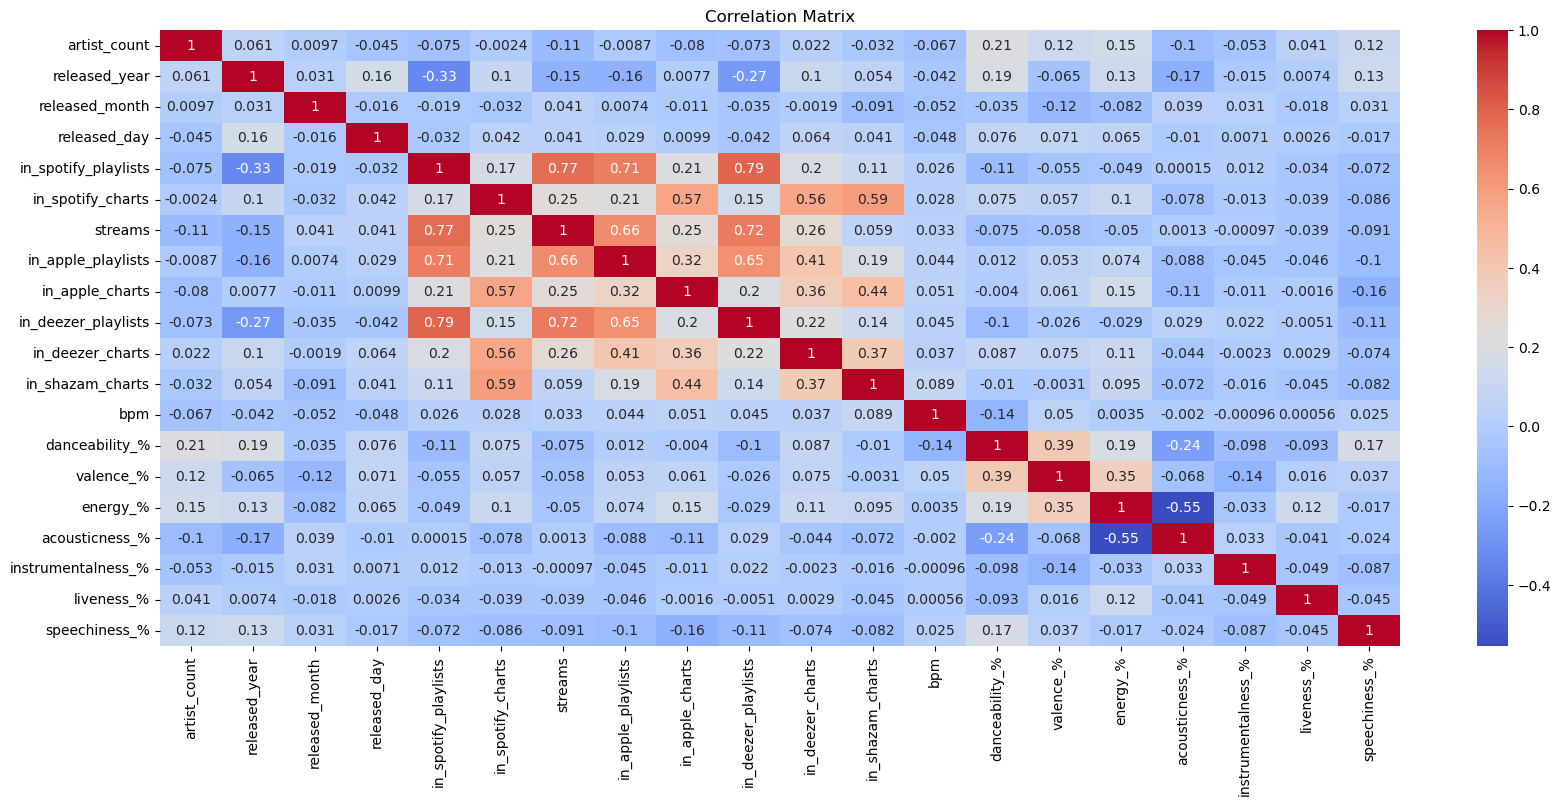

<Figure size 500x300 with 0 Axes>

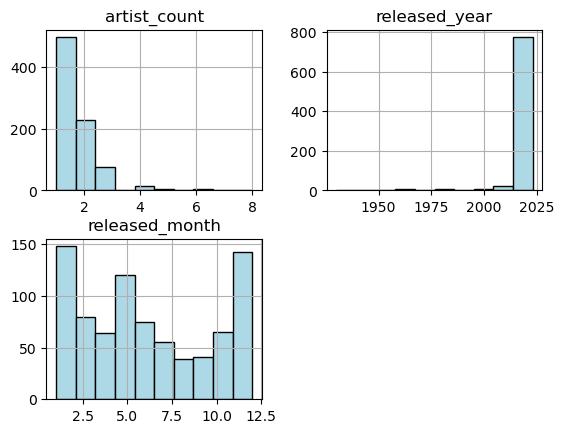

In [41]:

# Correlation matrix
corrMatrix = numericalFeatures.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Histograms of the first three selected features
selectedFeatures = numericalFeatures.columns[:3]
plt.figure(figsize=(5, 3))
df[selectedFeatures].hist(bins=10, color="lightblue", edgecolor="black")
plt.title('Histograms of Selected Features')
plt.show()

d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


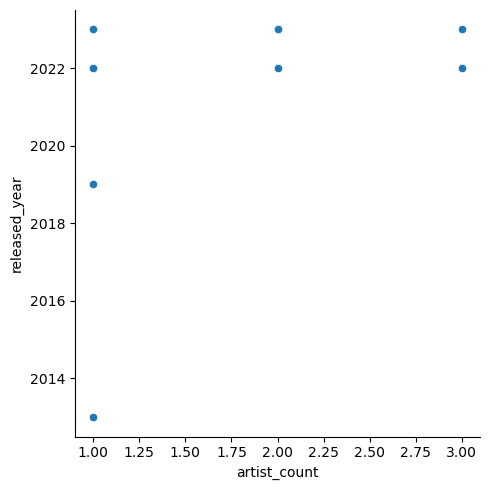

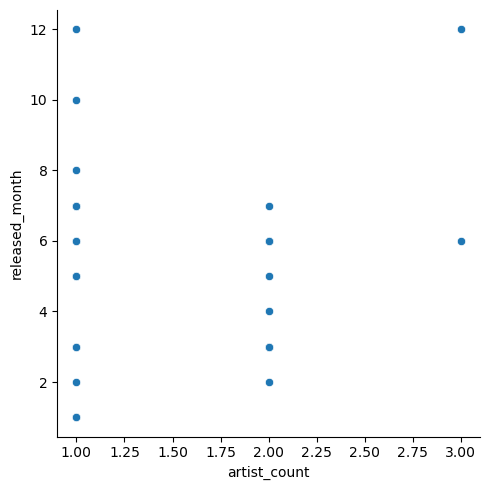

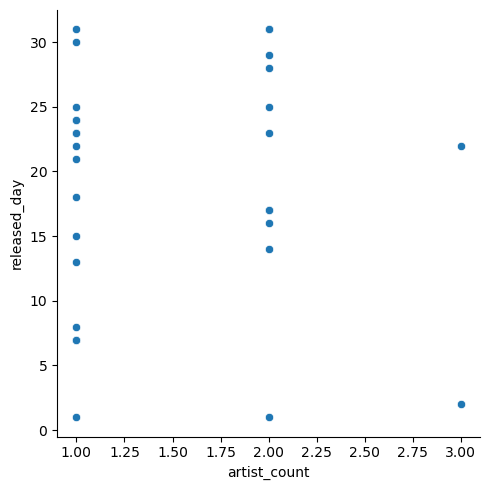

In [7]:
# Scatter plots
sns.relplot(x="artist_count", y="released_year", data=df)
sns.relplot(x="artist_count", y="released_month", data=df)
sns.relplot(x="artist_count", y="released_day", data=df)


In [ ]:
def remove_outliers_zscore(df, column, threshold=3):
    """
    Remove outliers based on Z-scores. A Z-score indicates how many standard deviations 
    a value is from the mean.
    
    Input:
    - df: DataFrame
    - column: column in which to detect outliers
    - threshold: Z-score threshold, default is 3 (commonly used)
    
    Output:
    - DataFrame without outliers for the given column
    """
    z_scores = np.abs(stats.zscore(df[column]))
    return df[z_scores < threshold]

    def outliers_z(df,col,threshold=3):


    val=np.abs(stats.zscore[df[col]])
    return df[val<threshold]

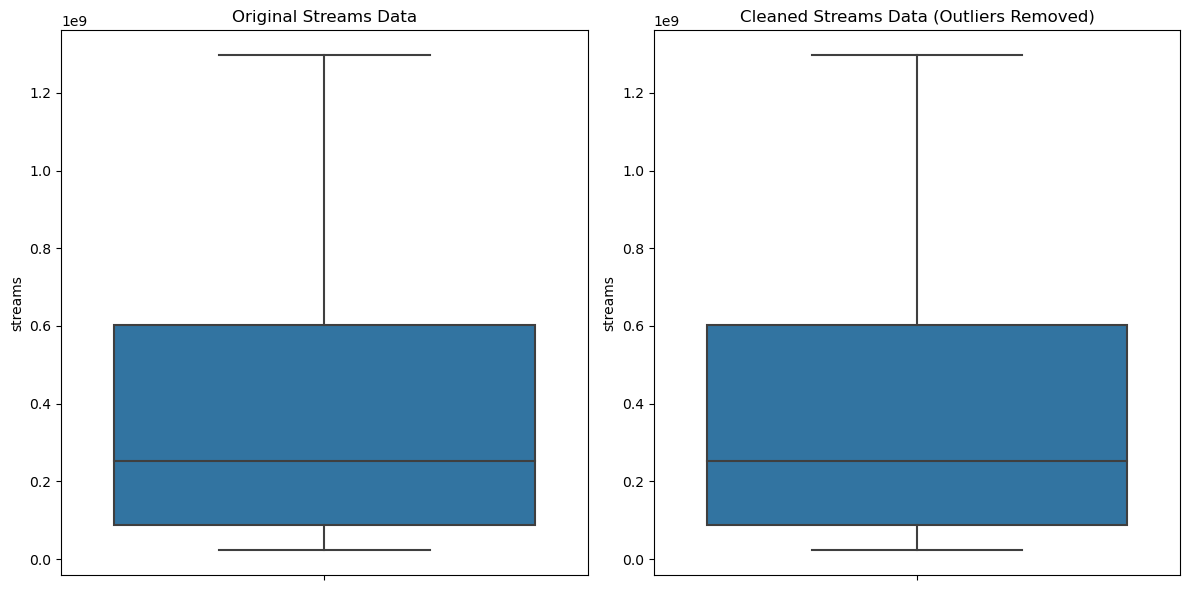

In [11]:
# Apply the remove_outliers_zscore function to remove outliers from 'streams'
cleaned_df = remove_outliers_zscore(df, 'streams')

# Create a figure with two subplots for box plots
plt.figure(figsize=(12, 6))

# Box plot for original 'streams' data
plt.subplot(1, 2, 1)
sns.boxplot(y=df['streams'])
plt.title('Original Streams Data')

# Box plot for cleaned 'streams' data after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=cleaned_df['streams'])
plt.title('Cleaned Streams Data (Outliers Removed)')

# Display the plots
plt.tight_layout()
plt.show()


In [49]:
# Statisctal Analysis



# Choose a column to visualize for normality tests
column_to_visualize = df['streams']  # Example column for testing normality

# Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_test_p_value = stats.shapiro(column_to_visualize)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test_statistic}")
print(f"Shapiro-Wilk Test p-value: {shapiro_test_p_value}")

# Kolmogorov-Smirnov test for normality
ks_test_statistic, ks_test_p_value = stats.kstest(column_to_visualize, 'norm', args=(column_to_visualize.mean(), column_to_visualize.std()))
print(f"Kolmogorov-Smirnov Test Statistic: {ks_test_statistic}")
print(f"Kolmogorov-Smirnov Test p-value: {ks_test_p_value}")

# Conclusion on normality
if shapiro_test_p_value > 0.05 and ks_test_p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")


Shapiro-Wilk Test Statistic: 0.7792739868164062
Shapiro-Wilk Test p-value: 5.686063657978343e-32
Kolmogorov-Smirnov Test Statistic: 0.17216615390454015
Kolmogorov-Smirnov Test p-value: 5.891785282303605e-22
The data does not appear to be normally distributed.


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import necessary metrics from sklearn
from sklearn.metrics import mean_squared_error, r2_score

# Plot regression line for 'instrumentalness_%' vs 'streams'

# Select only the 'instrumentalness_%' feature for regression
X_instr = df[['instrumentalness_%']]  # Double brackets to keep it as a DataFrame
y_instr = df['streams']

# Split the data into training and testing sets (optional, can skip if not splitting)
X_train_instr, X_test_instr, y_train_instr, y_test_instr = train_test_split(X_instr, y_instr, test_size=0.2, random_state=42)

# Create and train a new Linear Regression model on this single feature
model_instr = LinearRegression()
model_instr.fit(X_train_instr, y_train_instr)

# Predict using the single feature
y_pred_instr = model_instr.predict(X_instr)

# Calculate MSE and R2
mse_instr = mean_squared_error(y_instr, y_pred_instr)
r2_instr = r2_score(y_instr, y_pred_instr)

print(mse_instr,r2_instr)

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['instrumentalness_%'], df['streams'], color='blue', label='Data points')

# Plot the regression line
plt.plot(df['instrumentalness_%'], y_pred_instr, color='red', label='Regression Line')

# Add labels, title, and legend
plt.xlabel('instrumentalness_%')
plt.ylabel('Streams')
plt.title('Linear Regression: instrumentalness_% vs Streams')

## Display MSE and R² on the plot
#plt.text(60, 1.5e9, f'MSE: {mse_instr:.2f}', fontsize=12, color='black')
#plt.text(60, 1.4e9, f'R²: {r2_instr:.2f}', fontsize=12, color='black')

plt.legend()
plt.show()


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
file = "spotify.csv"
df = pd.read_csv(file)

# Select features
X = df['instrumentalness_%'].values  # Independent variable
Y = df['artist_count'].values  # Dependent variable

# Normalize features
X = (X - np.mean(X)) / np.std(X)

# Split data into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize parameters
w = 0  # Slope
b = 0  # Intercept
learning_rate = 0.01  # Step size for gradient descent
epochs = 1000  # Number of iterations
m = len(X_train)  # Number of training samples

# Gradient Descent
for epoch in range(epochs):
    Y_pred = w * X_train + b  # Predicted Y
    error = Y_pred - Y_train  # Compute error
    
    # Compute gradients
    dw = (2/m) * np.sum(error * X_train)
    db = (2/m) * np.sum(error)
    
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Print equation every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Y = {w:.4f} * X + {b:.4f}")

# Final equation
print(f"Final Regression Equation: Y = {w:.4f} * X + {b:.4f}")

# Evaluate on test set
Y_test_pred = w * X_test + b
mse = np.mean((Y_test_pred - Y_test) ** 2)  # Mean Squared Error
print(f"Mean Squared Error on Test Data: {mse:.4f}")


Epoch 0: Y = -0.0022 * X + 0.0300
Epoch 100: Y = -0.0840 * X + 1.3049
Epoch 200: Y = -0.0911 * X + 1.4740
Epoch 300: Y = -0.0916 * X + 1.4964
Epoch 400: Y = -0.0917 * X + 1.4994
Epoch 500: Y = -0.0917 * X + 1.4998
Epoch 600: Y = -0.0917 * X + 1.4998
Epoch 700: Y = -0.0917 * X + 1.4998
Epoch 800: Y = -0.0917 * X + 1.4998
Epoch 900: Y = -0.0917 * X + 1.4998
Final Regression Equation: Y = -0.0917 * X + 1.4998
Mean Squared Error on Test Data: 0.5204


In [16]:
# Function to make predictions
def predict(x):
    return w * x + b  # Using the learned regression equation

# Example prediction (replace `new_X_value` with your input)
new_X_value = 50  # Example instrumentalness_% value
predicted_Y = predict(new_X_value)

print(f"Predicted artist_count for instrumentalness_% = {new_X_value}: {predicted_Y:.2f}")


Predicted artist_count for instrumentalness_% = 50: -3.79


In [ ]:
import numpy as np
import pandas as pd

# Load dataset
file = "spotify.csv"
df = pd.read_csv(file)

# Select features (independent variables)
X1 = df['instrumentalness_%'].values  # Feature 1
X2 = df['bpm'].values  # Feature 2
Y = df['artist_count'].values  # Target variable

# Normalize features for better convergence (optional)
X1 = (X1 - np.mean(X1)) / np.std(X1)
X2 = (X2 - np.mean(X2)) / np.std(X2)

# Initialize parameters
w1, w2 = 0, 0  # Weights for X1 and X2
b = 0  # Intercept
learning_rate = 0.01  # Step size
epochs = 1000  # Number of iterations
m = len(Y)  # Number of data points

# Gradient Descent
for epoch in range(epochs):
    Y_pred = w1 * X1 + w2 * X2 + b  # Predicted Y
    error = Y_pred - Y  # Compute error
    
    # Compute gradients
    dw1 = (2/m) * np.sum(error * X1)
    dw2 = (2/m) * np.sum(error * X2)
    db = (2/m) * np.sum(error)
    
    # Update parameters
    w1 -= learning_rate * dw1
    w2 -= learning_rate * dw2
    b -= learning_rate * db

    # Print equation every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Y = {w1:.4f} * X1 + {w2:.4f} * X2 + {b:.4f}")

# Final regression equation
print(f"Final Regression Equation: Y = {w1:.4f} * X1 + {w2:.4f} * X2 + {b:.4f}")


Epoch 0: Y = -0.0009 * X1 + -0.0007 * X2 + 0.0311
Epoch 100: Y = -0.0390 * X1 + -0.0298 * X2 + 1.3539
Epoch 200: Y = -0.0441 * X1 + -0.0337 * X2 + 1.5293
Epoch 300: Y = -0.0448 * X1 + -0.0342 * X2 + 1.5526
Epoch 400: Y = -0.0449 * X1 + -0.0343 * X2 + 1.5557
Epoch 500: Y = -0.0449 * X1 + -0.0343 * X2 + 1.5561
Epoch 600: Y = -0.0449 * X1 + -0.0343 * X2 + 1.5561
Epoch 700: Y = -0.0449 * X1 + -0.0343 * X2 + 1.5561
Epoch 800: Y = -0.0449 * X1 + -0.0343 * X2 + 1.5561
Epoch 900: Y = -0.0449 * X1 + -0.0343 * X2 + 1.5561
Final Regression Equation: Y = -0.0449 * X1 + -0.0343 * X2 + 1.5561


In [11]:
# Function to make predictions
def predict(x1, x2):
    return w1 * x1 + w2 * x2 + b  # Use learned regression equation

# Example Prediction
new_X1 = 50  # Example instrumentalness_%
new_X2 = 120  # Example bpm
predicted_Y = predict(new_X1, new_X2)

print(f"Predicted artist_count for instrumentalness_% = {new_X1}, bpm = {new_X2}: {predicted_Y:.2f}")


Predicted artist_count for instrumentalness_% = 50, bpm = 120: -4.80


In [3]:
import numpy as np
import pandas as pd

# Load dataset
file = "spotify.csv"
df = pd.read_csv(file)

# Select features (independent variables)
X1 = df['instrumentalness_%'].values  # Feature 1
X2 = df['bpm'].values  # Feature 2
Y = df['rating'].values  # Target variable (1 or 0)

# Normalize features for better convergence
X1 = (X1 - np.mean(X1)) / np.std(X1)
X2 = (X2 - np.mean(X2)) / np.std(X2)

# Stack features together into a matrix
X = np.column_stack((X1, X2))

# Initialize parameters
w = np.zeros(X.shape[1])  # Weights (for X1 and X2)
b = 0  # Bias
learning_rate = 0.01  # Step size
epochs = 1000  # Number of iterations
m = len(Y)  # Number of data points

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent
for epoch in range(epochs):
    Z = np.dot(X, w) + b  # Linear combination
    Y_pred = sigmoid(Z)  # Apply sigmoid
    
    # Compute gradients
    error = Y_pred - Y
    dw = (1/m) * np.dot(X.T, error-Y)
    db = (1/m) * np.sum(error-Y)
    
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        loss = -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))  # Binary cross-entropy
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Final equation
print(f"Final Logistic Regression Equation: Z = {w[0]:.4f} * X1 + {w[1]:.4f} * X2 + {b:.4f}")


Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.4496
Epoch 200: Loss = 0.4046
Epoch 300: Loss = 0.4297
Epoch 400: Loss = 0.4809
Epoch 500: Loss = 0.5426
Epoch 600: Loss = 0.6089
Epoch 700: Loss = 0.6772
Epoch 800: Loss = 0.7465
Epoch 900: Loss = 0.8161
Final Logistic Regression Equation: Z = 0.5908 * X1 + 2.5968 * X2 + 7.4194


In [22]:
# Function to make predictions
def predict(x1, x2):
    z = w[0] * x1 + w[1] * x2 + b  # Linear equation
    return 1 if sigmoid(z) >= 0.5 else 0  # Apply threshold

# Example Prediction
new_X1 = 50  # Example instrumentalness_%
new_X2 = 120  # Example bpm
predicted_rating = predict(new_X1, new_X2)

print(f"Predicted rating for instrumentalness_% = {new_X1}, bpm = {new_X2}: {predicted_rating}")


Predicted rating for instrumentalness_% = 50, bpm = 120: 1


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
file = "spotify.csv"
df = pd.read_csv(file)

# Select features
X1 = df['instrumentalness_%'].values
X2 = df['bpm'].values  
Y = df['rating'].values  

# Normalize features
X1 = (X1 - np.mean(X1)) / np.std(X1)
X2 = (X2 - np.mean(X2)) / np.std(X2)

# Combine features into a single matrix
X = np.column_stack((X1, X2))

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
w = np.zeros(X_train.shape[1])  # (2,) for two features
b = 0
learning_rate = 0.01
epochs = 1000
m = len(X_train)

# Gradient Descent
for epoch in range(epochs):
    Y_pred = np.dot(X_train, w) + b  # Compute linear combination
    error = sigmoid(Y_pred)  # Apply sigmoid function

    # Compute gradients
    dw = (1/m) * np.dot(X_train.T, (error - Y_train))  
    db = (1/m) * np.sum(error - Y_train)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        loss = -np.mean(Y_train * np.log(error) + (1 - Y_train) * np.log(1 - error))  # Binary cross-entropy
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Final equation
print(f"Final Logistic Regression Equation: Z = {w[0]:.4f} * X1 + {w[1]:.4f} * X2 + {b:.4f}")


Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.5599
Epoch 200: Loss = 0.4823
Epoch 300: Loss = 0.4340
Epoch 400: Loss = 0.4019
Epoch 500: Loss = 0.3795
Epoch 600: Loss = 0.3632
Epoch 700: Loss = 0.3509
Epoch 800: Loss = 0.3413
Epoch 900: Loss = 0.3338
Final Logistic Regression Equation: Z = 0.0588 * X1 + 0.8514 * X2 + 1.4597
